
# Digit Classification with KNN

# Intro
---
In this project, I'll implement my own image recognition system for classifying digits using K-Nearest Neighbors (KNN).

In [11]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [1]:
import sklearn

sklearn.__version__

'1.3.0'

Load the data and split into train, test, and dev.

In [3]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name="mnist_784", return_X_y=True, cache=False, as_frame=False)

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print("data shape: ", X.shape)
print("label shape:", Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

c:\Users\evans\PycharmProjects\w207_mnist_knn\.venv\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


data shape:  (70000, 784)
label shape: (70000,)


### Visualize a select sample of images
---
Here, I will show a 10x10 grid that visualizes 10 examples of each digit to get an idea of what our data looks like.

* I will use `plt.rc()` for setting the colormap, for example to black and white.
* I will use `plt.subplot()` for creating subplots.
* I will use `plt.imshow()` for rendering a matrix.
* I will use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

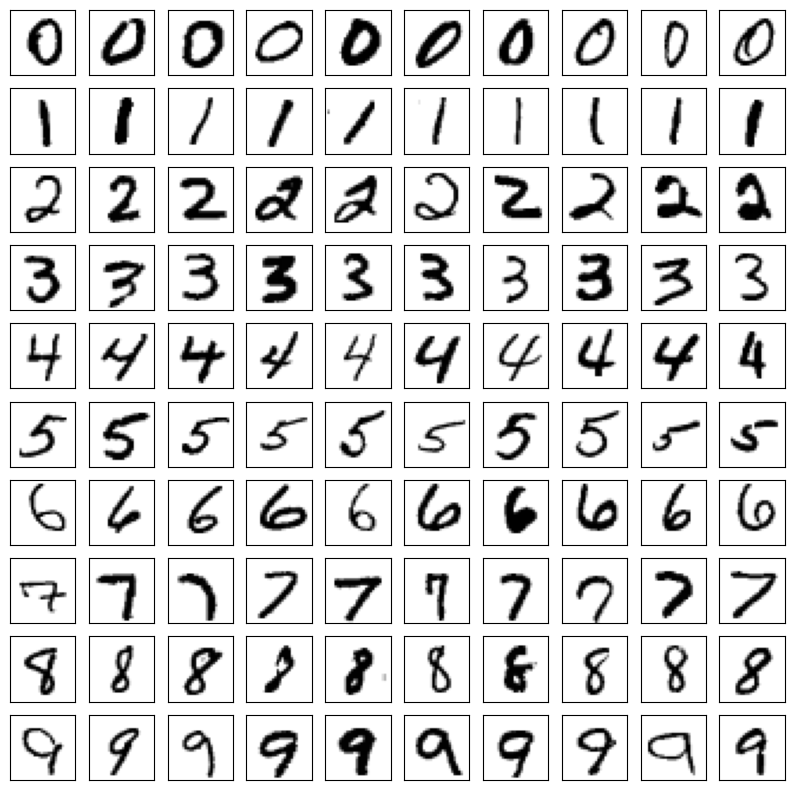

In [34]:
def plot_digits(num_examples: int=10):
    """
    Plot a grid of examples of handwritten digits from the dataset.

    Parameters:
    num_examples (int): Number of examples to display for each digit. Default is 10.

    Returns:
    None
    """

    n_rows = num_examples  # number of rows on grid
    n_cols = num_examples  # number of columns on grid
    count = 0  # make sure there are 10 examples of each digit
    i = 0  # index of the subplot

    digits = np.unique(Y.astype(int))  # only want unique digits with type int

    plt.figure(figsize=(n_cols, n_rows))  # figure will have correct dimensions 10x10

    for digit in range(len(digits)):
        for image in range(len(X)):
            if digits[digit] == (Y).astype(int)[image]:
                count += 1
                matrix_image = X[image, :]
                reshaped_image = matrix_image.reshape(28, 28)
                plt.subplot(10, 10, i + 1)
                plt.xticks([])
                plt.yticks([])
                plt.imshow(reshaped_image, cmap=plt.cm.binary)
                i += 1

            if count == num_examples:
                count = 0
                break

    plt.show()

plot_digits(10)

### Evaluating different choices of k
---
Steps:

1. Produce k-Nearest Neighbors models with k = 1, 3, 5, 7, and 9.  
1. Print the accuracy of each model. 
1. Additionally, only for the 1-Nearest Neighbor model, show the precision, recall, and F1 for each label. 
1. Find out which digit is the most *difficult* for the 1-Nearest Neighbor model to classify correctly, if any.

In [8]:
dev_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
def evaluate_knn_models(k_values: list, mini_train_data: np.array, mini_train_labels: np.array, dev_data: np.array, dev_labels: np.array) -> None:
    """
    Evaluate k-Nearest Neighbors (k-NN) models with different values of k and 
    report their accuracy on a development dataset. Additionally, for the 1-NN model,
    it shows the precision, recall, and F1-score for each label.

    Parameters:
    k_values (list): List of integers specifying the values of k for k-NN models.
    mini_train_data (numpy.ndarray): Training data.
    mini_train_labels (numpy.ndarray): Labels for the training data.
    dev_data (numpy.ndarray): Development data for evaluation.
    dev_labels (numpy.ndarray): Labels for the development data.

    Returns:
    None
    """

    for i in k_values:
        dev_true_labels = dev_labels
        KNN = KNeighborsClassifier(n_neighbors=i)
        KNN.fit(mini_train_data, mini_train_labels)
        dev_predicted_labels = KNN.predict(dev_data)
        wrong_prediction = dev_predicted_labels != dev_true_labels
        print(
            f"accuracy for k = {i}:",
            (len(dev_labels) - np.sum(wrong_prediction)) / len(dev_labels),
        )
    KNN1 = KNeighborsClassifier(n_neighbors=1)
    KNN1.fit(mini_train_data, mini_train_labels)
    dev_predicted_labels1 = KNN1.predict(dev_data)
    print(classification_report(y_true=dev_labels, y_pred=dev_predicted_labels1))

k_values = [1, 3, 5, 7, 9]
evaluate_knn_models(k_values, mini_train_data, mini_train_labels, dev_data, dev_labels)

accuracy for k = 1: 0.884
accuracy for k = 3: 0.876
accuracy for k = 5: 0.882
accuracy for k = 7: 0.877
accuracy for k = 9: 0.875
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000



The digit that is most difficult for the 1-Nearest Neighbor model to classify correctly is the digit "8". This is because 8 has the lowest recall with a value of 0.80. This means of all the true 8s that we had in our dev_labels, 80% were actually correctly classified. The model failed to find 20% of the 8s. 

### Examining the importance of training size
---
Steps:
1. Produce 1-Nearest Neighbor models using training data of various sizes. For example, ```train_data[:train_size]```.
1. Evaluate and show the accuracy achieved by each model.  
1. Show the time needed to: 
  1. Train each model.
  1. Measure the accuracy of each model.
1. Plot on the same graph (as a function of training size):
  1. the time needed for training
  1. the time needed for calculating accuracy

Notes:
* Using `KNeighborsClassifier` to produce a k-nearest neighbor model.
* Using `time.time()` to measure elapsed time of operations.

,train size,train time,accuracy,eval time
0,100,0.001000,0.702,0.006001
1,200,0.001001,0.791,0.006001
2,400,0.001001,0.811,0.007001
3,800,0.001000,0.866,0.015049
4,1600,0.004028,0.905,0.033764
5,3200,0.004000,0.927,0.039056
6,6400,0.009002,0.939,0.064979
7,12800,0.019004,0.952,0.090774
8,25600,0.035178,0.963,0.158427


<Axes: xlabel='train size'>

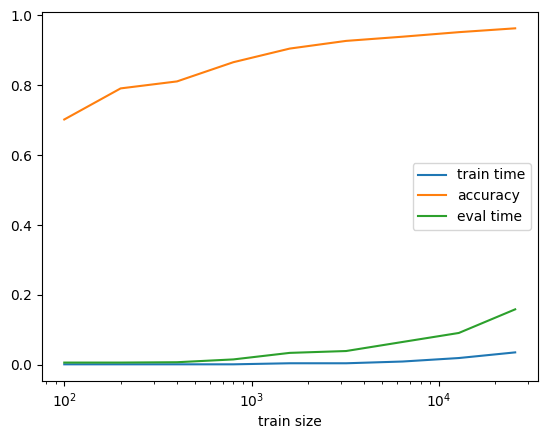

In [17]:
def evaluate_knn_train_sizes(train_sizes: list, accuracies: list, train_times: list, eval_times: list) -> pd.DataFrame:
    """
    Evaluate a k-Nearest Neighbors (k-NN) model with varying training sizes and report 
    accuracy, training time, and evaluation time for each training size.

    Parameters:
    train_sizes (list): List of integers specifying different training dataset sizes.
    train_data (numpy.ndarray): Training data.
    train_labels (numpy.ndarray): Labels for the training data.
    dev_data (numpy.ndarray): Development data for evaluation.
    dev_labels (numpy.ndarray): Labels for the development data.

    Returns:
    pandas.DataFrame: A DataFrame containing columns for train size, accuracy, training time, 
                     and evaluation time.
    """
    
    results = []
    for i in train_sizes:
        curr_result = {"train size": i}
        dev_true_labels = dev_labels
        KNN1 = KNeighborsClassifier(n_neighbors=1)
        start_time = time.time()
        KNN1.fit(train_data[:i], train_labels[:i])
        train_time = time.time()
        curr_result["train time"] = train_time - start_time
        eval_start = time.time()
        dev_predicted_labels = KNN1.predict(dev_data)
        wrong_prediction = dev_predicted_labels != dev_true_labels
        accuracy = (len(dev_true_labels) - np.sum(wrong_prediction)) / len(
            dev_true_labels
        )
        curr_result["accuracy"] = accuracy
        eval_time = time.time()
        curr_result["eval time"] = eval_time - eval_start
        results.append(curr_result)
    return pd.DataFrame(results)


train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
train_times = []
eval_times = []
df = evaluate_knn_train_sizes(train_sizes, accuracies, train_times, eval_times)
display(df)
df.plot(x="train size", y=["train time", "accuracy", "eval time"], logx=True)

I anticipated that increasing the size of our training dataset would positively impact accuracy. As we expanded the training dataset, we indeed observed a noticeable improvement in accuracy. This improvement can be attributed to the higher volume of data points, which increased the likelihood of our evaluation set closely matching patterns in our training data.

Naturally, as we augmented the training dataset, both training and evaluation times experienced slight increments. This aligns with our expectations, as a larger dataset demands more time for the KNN algorithm to train and make predictions.

However, it's worth noting that the relationship between evaluation time and test size did not follow a consistent trend. While we expected evaluation time to consistently rise with test size, we encountered fluctuations in this relationship as the test size increased.

### Evaluating if we should obtain additional data
---

In this question we wish to predict what accuracy we would get if we had additional training data.

Our input, our features and labels, are the output from the previous question. Based on the training size and accuracy we got in the previous question, we wish to predict the accuracy we would get if we had larger training sizes.

In this section, I'll delve into assessing the potential benefits of acquiring more training data. I will be using the feature and label data obtained from the previous analysis. The goal is to predict the accuracy we could achieve with larger training datasets.

Linear Regression Model for Accuracy Prediction
1. To begin, I'll construct a linear regression model that predicts the accuracy of a 1-Nearest Neighbor model based on the training set size.
1. I'll measure the model's performance by calculating its coefficient of determination, denoted as $R^2$.

Predicted Accuracies
1. I'll utilize this linear regression model to predict accuracies for three specific training set sizes: 60,000, 120,000, and 1,000,000.
1. These predictions will be visualized alongside the actual accuracies obtained in the previous question. I'll create a line plot graph with training set size on the X-axis and accuracy on the Y-axis. This visualization will help us assess the quality of the predictions.

Identifying Model Limitations
1. I'll scrutinize the linear regression model's performance and identify two main issues.
1. To address these issues, I'll apply appropriate transformations to both the predictor features and the outcome variable.
1. The improved linear regression model's $R^2$ score will be reported.

Visualizing Improved Predictions
1. I'll once again predict accuracies for the same training set sizes (60,000, 120,000, and 1,000,000) using the enhanced model.
1. A line plot graph will be created to visualize the actual and predicted accuracies. This time, I'll ensure that the Y-axis represents accuracy, and the X-axis corresponds to the training set size in its original scale, not the transformed space.

Notes:
* Both linear regression models will be trained and evaluated using the transformed accuracies estimated with evaluate_knn_train_sizes.
* The sklearn LinearRegression class will be employed for building the linear regression models.
* It's essential to address two main challenges: model fitting and predicting logical accuracy values.
* To handle these challenges, I'll explore the use of the logistic and logit functions for appropriate transformations. These functions map values between $\infty$ and $-\infty$ to the range $(0, 1)$.

The R2 value for the standard linear regression model: 0.4177006634161019


c:\Users\evans\PycharmProjects\w207_mnist_knn\.venv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,train size,accuracy
0,100,0.702000
1,200,0.791000
2,400,0.811000
3,800,0.866000
4,1600,0.905000
5,3200,0.927000
6,6400,0.939000
7,12800,0.952000
8,25600,0.963000
0,60000,1.236173


accuracies for sizes 60000, 120000, and 1000000: (1.247411, 1.664515, 7.782039)


,train size,accuracy,logit accuracy
0,100,0.702000,0.668631
1,200,0.791000,0.688046
2,400,0.811000,0.692323
3,800,0.866000,0.703913
4,1600,0.905000,0.711976
5,3200,0.927000,0.716466
6,6400,0.939000,0.718898
7,12800,0.952000,0.721517
8,25600,0.963000,0.723722
0,60000,1.236173,0.774897


logit accuracies for sizes 60000, 120000, and 1000000: (0.776851, 0.840843, 0.999583)
The R2 value for the transformed linear regression model: 0.8579468482887074


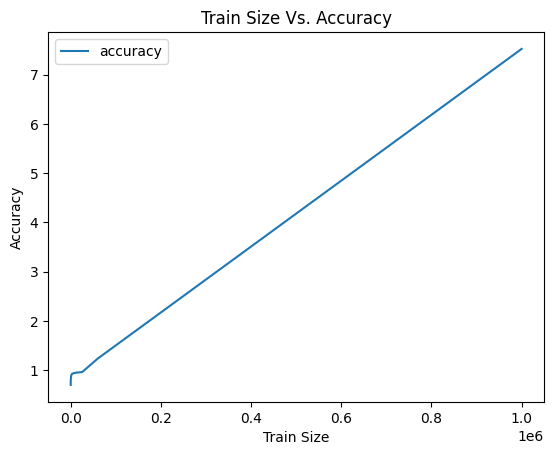

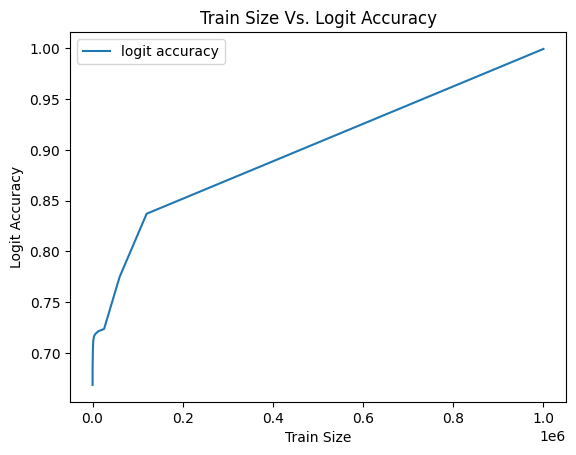

In [18]:
def predict_accuracy_with_linear_regression(new_sizes: np.array, df: pd.DataFrame) -> pd.DataFrame:
    """
    Plot accuracies and perform linear regression on the relationship between training set size 
    and accuracy.

    Parameters:
    new_sizes (numpy.ndarray): An array of new training set sizes for prediction.
    df (pandas.DataFrame): A DataFrame containing columns for train size and accuracy.

    Returns:
    pandas.DataFrame: A DataFrame containing columns for train size, accuracy, and predicted accuracy.
    R-squared (float): The R-squared value of the linear regression model.
    """

    KNN1_reg = LinearRegression().fit(df[["train size"]], df[["accuracy"]])
    predicted_acc = KNN1_reg.predict(new_sizes)
    df2 = pd.DataFrame()
    df2["train size"] = new_sizes.flatten()
    df2["accuracy"] = predicted_acc
    R2 = KNN1_reg.score(df[["train size"]], df[["accuracy"]])
    print(f"The R2 value for the standard linear regression model: {R2}")
    return pd.concat([df[["train size", "accuracy"]], df2])


new_sizes = np.array([60000, 120000, 1000000]).reshape(-1, 1)
df2 = predict_accuracy_with_linear_regression(new_sizes, df)
display(df2)
df2.plot(
    x="train size",
    y="accuracy",
    xlabel="train size".title(),
    ylabel="Accuracy",
    title="Train size vs. accuracy".title(),
)
print(
    f"accuracies for sizes 60000, 120000, and 1000000: {1.247411, 1.664515, 7.782039}"
)
df2["logit accuracy"] = 1 / (1 + np.e ** (-df2["accuracy"]))
display(df2)
KNN1_reg_transformed = LinearRegression().fit(
    df2[["train size"]], df2[["logit accuracy"]]
)
R2_transformed = KNN1_reg_transformed.score(
    df2[["train size"]], df2[["logit accuracy"]]
)
df2.plot(
    x="train size",
    y="logit accuracy",
    xlabel="train size".title(),
    ylabel="Logit Accuracy",
    title="Train size vs. logit accuracy".title(),
)
print(
    f"logit accuracies for sizes 60000, 120000, and 1000000: {0.776851, 0.840843, 0.999583}"
)
print(f"The R2 value for the transformed linear regression model: {R2_transformed}")
### STUDENT END ###

In [103]:
new_sizes.shape

(3, 1)

Our model exhibits two notable deviations from expected behavior. Firstly, it generates predicted accuracies that surpass the upper limit of 1.00, a condition deemed impossible in standard accuracy assessments. Secondly, it reveals a consistent linear trend in accuracy as the training size expands significantly. This observed constancy contradicts typical assumptions, particularly when transitioning from a training size of 25,600 to hypothetical sizes of 120,000 or 1,000,000. 

### Getting to know the confusion matrix.
---

I'll start by constructing a 1-Nearest Neighbor model, followed by visualizing the confusion matrix, identifying commonly confused digits (e.g., mistaking digit 1 for digit 7), and examining examples of misclassified digits.

(Note: I'll be using the mini train set for training and the dev set for evaluation. We can easily generate the confusion matrix using `confusion_matrix()` without the need for complex calculations to determine the most confused digits.)

[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]


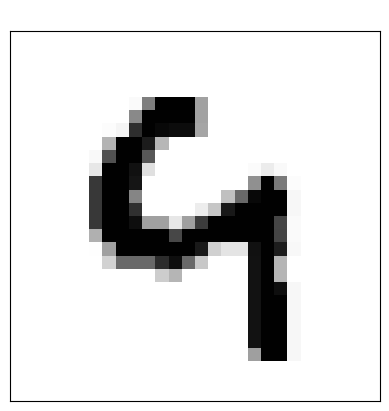

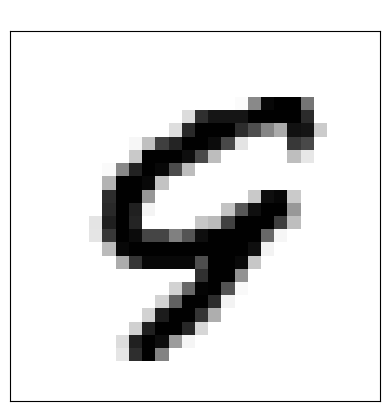

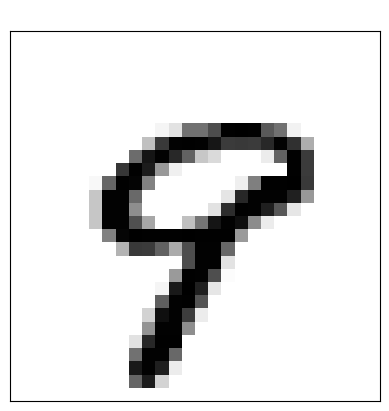

In [33]:
def evaluate_knn_confusion() -> tuple:
    """
    Evaluate a 1-Nearest Neighbor model using a confusion matrix and return the confusion matrix
    and a list of true labels and predicted labels.

    Parameters:
    None (assumes the required data is available in the global scope).

    Returns:
    tuple: A tuple containing two elements:
        - numpy.ndarray: The confusion matrix of the model.
        - list: A list of tuples, each containing a true label and its corresponding predicted label.
    """

    true_lab = dev_labels
    KNN1 = KNeighborsClassifier(n_neighbors=1)
    KNN1.fit(mini_train_data, mini_train_labels)
    dev_predicted_labels = KNN1.predict(dev_data)
    c_mat = confusion_matrix(y_true=dev_labels, y_pred=dev_predicted_labels)
    results = list(zip(dev_labels, dev_predicted_labels))
    return c_mat, results


c_mat, results = evaluate_knn_confusion()
print(c_mat)


def show_from_index(index: int, data: np.array=dev_data):
    """
    Display an image from the dataset at the specified index.

    Parameters:
    index (int): The index of the image to display.
    data (np.array): The dataset containing the images. Default is set to dev_data.

    Returns:
    None
    """
    matrix_image = data[index, :]
    reshaped_image = matrix_image.reshape(28, 28)
    fig, axis1 = plt.subplots(1, 1)
    axis1.set_title(str(index), color="white")
    plt.xticks([])
    plt.yticks([])
    plt.imshow(reshaped_image, cmap=plt.cm.binary)
    return plt.show()


should_be_nines = []
for i, pair in enumerate(results):
    if pair == ("9", "4"):
        should_be_nines.append(i)
        show_from_index(i)


The model most often confuses the digit 4 with the digit 9. There were 11 False positives where a 9 was classified as a 4. 

## Conclusion

In our analysis of a 1-Nearest Neighbor model, key summary statistics like accuracy, the confusion matrix, recall, and precision provide valuable insights into the model's performance. Notably, digit 9 was often misclassified as 4, with a recall of 0.80, meaning 20% of true 9s were incorrectly classified. To improve this, we may explore feature engineering, data augmentation, and hyperparameter tuning.